In [4]:
import numpy as np
import matplotlib.pyplot as plt
import reionizer
import os

from matplotlib import rc_file
rc_file(os.environ['WORK_DIR']+'/code/matplotlibrc')

%matplotlib inline

import seaborn as sns

plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (4,4)

In [73]:
logMh = 12.

vcirc = reionizer.vcirc(logMh=logMh, z=7.)

In [74]:
def make_DV_samples(Mh, Ndraw=100):
    """
    Make DV samples given Mh

    Only draw samples for unique Mh
    """
    Ndraw = int(Ndraw)

    DV_samples = np.zeros(Ndraw)
    DV_tab     = np.linspace(0., 2000., 1000)

    # Only calculate for unique Mh values
    pdf_DV_Mh = reionizer.p_DV_logMh(np.array([Mh]), DV=DV_tab).ravel()
    
    # Will always complain integral != because there is a tail to high DV
    DV_samples = reionizer.sample_from_pdf(pdf_DV_Mh, x=DV_tab, Ndraw=Ndraw, pmin=0.0, pmax=0.97,
                                                            param='\Delta v', plot=False)
    
    return DV_samples

# Transmission (fixed)

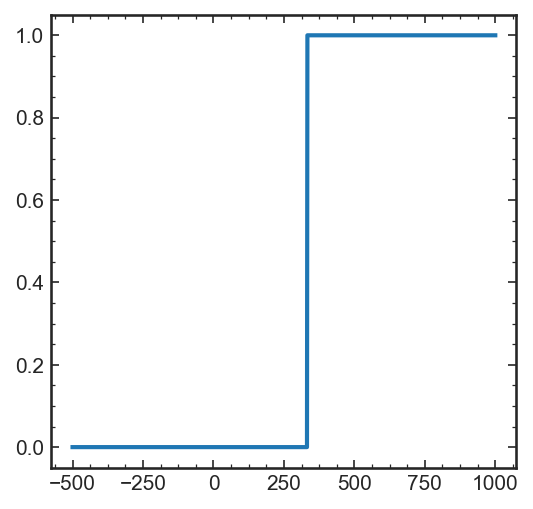

In [75]:
velocity = np.linspace(-500, 1000, 1000)

transmission = np.zeros(len(velocity))
transmission[velocity > vcirc] = 1.

plt.plot(velocity, transmission)

In [76]:
DV_init = make_DV_samples([logMh])

def T_IGM(DV_init, scale_DV=1.):
    
    lines_init = np.array([reionizer.line_shape_gauss(v=velocity, vcenter=DV, fwhm=DV) for DV in scale_DV*DV_init])

    # Transmitted if cut at vcirc
    lines_transmitted1 = lines_init * transmission

    T_igm = np.trapz(lines_transmitted1, velocity)
    
    return T_igm

# How much do we need to evolve DV by to get Tigm ~ 30-60%?

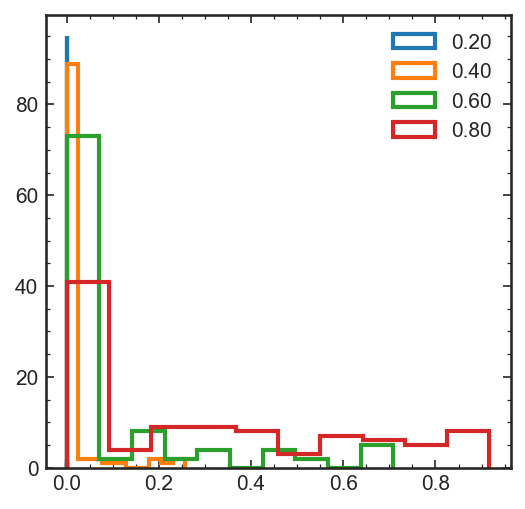

In [77]:
# Initial T_IGM
T_IGM_init = T_IGM(DV_init, scale_DV=1.)

scale = np.arange(0.2, 1, 0.2)
for s in scale:
    T = T_IGM(DV_init, scale_DV=s)
    
    T_rel = T/T_IGM_init
    
    plt.hist(T_rel, histtype='step', lw=2, label='%.2f' % s)
    
plt.legend()

In [78]:
(7./8)**3.

0.669921875